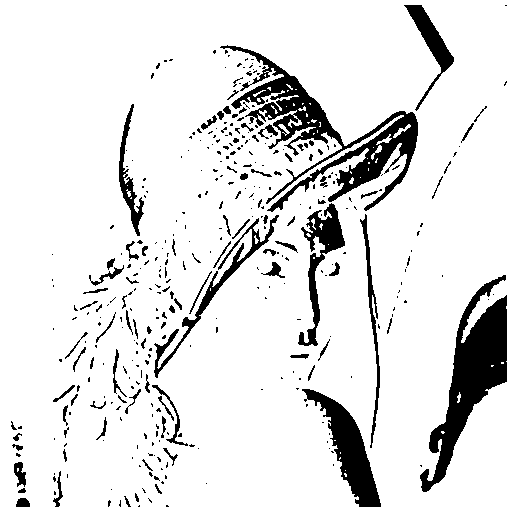

In [74]:
from PIL import Image, ImageDraw
import numpy as np
    
def Laplace(img,threshold,mask):
    pixel = img.load()
    img_new = Image.new(img.mode,img.size)
    array = np.zeros((img.width,img.height))
    for i in range(1,img.width-1):
        for j in range(1,img.height-1):
            temp = 0
            for x in range(-1,2):
                for y in range(-1,2):
                    temp += pixel[i+x,j+y]*mask[x+1][y+1]
            array[i][j] = temp
            
    for i in range(img.width):
        for j in range(img.height):
            if array[i,j] < threshold:
                img_new.putpixel((i,j),255)
            else:
                img_new.putpixel((i,j),0)
    return img_new

def Gaussian(img,threshold,mask):
    pixel = img.load()
    img_new = Image.new(img.mode,img.size)
    array = np.zeros((img.width,img.height))
    for i in range(5,img.width-5):
        for j in range(5,img.height-5):
            temp = 0
            for x in range(-5,6):
                for y in range(-5,6):
                    temp += pixel[i+x,j+y]*mask[-x+5][-y+5]
            array[i][j] = temp
    for i in range(img.width):
        for j in range(img.height):
            if array[i,j] < threshold:
                img_new.putpixel((i,j),255)
            else:
                img_new.putpixel((i,j),0)
    return img_new

    
lena = Image.open("lena.bmp")
mask1 = np.array([[0 , 1 , 0],
                  [1 ,-4 , 1],
                  [0 , 1 , 0]])
mask2 = (1/3) * np.array([[1, 1, 1],
                          [1,-8, 1],
                          [1, 1, 1]])
minimum_mask = (1/3) * np.array([[ 2,-1, 2],
                                 [-1,-4,-1],
                                 [ 2,-1, 2]])
'''
gaussian_mask = np.array([[ 0, 0,  0, -1, -1, -2, -1, -1,  0, 0, 0],
                          [ 0, 0, -2, -4, -8, -9, -8, -4, -2, 0, 0],
                          [ 0,-2, -7,-15,-22,-23,-22,-15, -7,-2, 0],
                          [-1,-4,-15,-24,-14, -1,-14,-24,-15,-4,-1],
                          [-1,-8,-22,-14, 52,103, 52,-14,-22,-8,-1],
                          [-2,-9,-23, -1,103,179,103, -1,-23,-9,-2],
                          [-1,-8,-22,-14, 52,103, 52,-14,-22,-8,-1],
                          [-1,-4,-15,-24,-14, -1,-14,-24,-15,-4,-1],
                          [ 0,-2, -7,-15,-22,-23,-22,-15, -7,-2, 0],
                          [ 0, 0, -2, -4, -8, -9, -8, -4, -2, 0, 0],
                          [ 0, 0,  0, -1, -1, -2, -1, -1,  0, 0, 0]])
                          
diff_gaussian = np.array([[ -1.  -3.  -4.  -6.  -7.  -8.  -7.  -6.  -4.  -3.  -1.]
                          [ -3.  -5.  -8. -11. -13. -13. -13. -11.  -8.  -5.  -3.]
                          [ -4.  -8. -12. -16. -17. -17. -17. -16. -12.  -8.  -4.]
                          [ -6. -11. -16. -16.   0.  15.   0. -16. -16. -11.  -6.]
                          [ -7. -13. -17.   0.  85. 160.  85.   0. -17. -13.  -7.]
                          [ -8. -13. -17.  15. 160. 283. 160.  15. -17. -13.  -8.]
                          [ -7. -13. -17.   0.  85. 160.  85.   0. -17. -13.  -7.]
                          [ -6. -11. -16. -16.   0.  15.   0. -16. -16. -11.  -6.]
                          [ -4.  -8. -12. -16. -17. -17. -17. -16. -12.  -8.  -4.]
                          [ -3.  -5.  -8. -11. -13. -13. -13. -11.  -8.  -5.  -3.]
                          [ -1.  -3.  -4.  -6.  -7.  -8.  -7.  -6.  -4.  -3.  -1.]])
'''

gaussian_mask = np.zeros((11,11))
sigma = 1.4
for i in range(-5,6,1):
    for j in range(-5,6,1):
        tmp = -175 * (((i * i) + (j * j) - 2 * sigma * sigma) * np.exp(((i * i) + (j * j)) / (-2 * sigma * sigma)) / (sigma * sigma * sigma * sigma))
        if tmp > 0:
            gaussian_mask[i+5,j+5] = int (tmp + 0.5)
        else:                 
            gaussian_mask[i+5,j+5] = int (tmp - 0.5)

diff_gaussian = np.zeros((11,11))
sigma1 = 1
sigma2 = 3
for i in range(-5,6,1):
    for j in range(-5,6,1):
        tmp1 = ( 1/(2 * np.pi * sigma1 ** 2) ) * np.exp( (-0.5) * ((i**2) + (j**2)) / ((sigma1)**2 ) )
        tmp2 = ( 1/(2 * np.pi * sigma2 ** 2) ) * np.exp( (-0.5) * ((i**2) + (j**2)) / ((sigma2)**2 ) )
        diff_gaussian[i+5,j+5] = int ( (tmp1 - tmp2) * 2000.0 + 0.5 ) 

#Laplace_Mask1 = Laplace(lena,18,mask1)
#Laplace_Mask2 = Laplace(lena,18,mask2)
#Minimum_variance_Laplace = Laplace(lena,20,minimum_mask)
#Laplace_Mask1.save("Laplace_Mask1.bmp")
#Laplace_Mask2.save("Laplace_Mask2.bmp")
#Minimum_variance_Laplace.save("Minimum_variance_Laplace.bmp")
#Laplace_of_Gaussuan = Gaussian(lena,5000,gaussian_mask)
#Laplace_of_Gaussuan.save("Laplace_of_Gaussuan.bmp")
Difference_of_Gaussian = Gaussian(lena,70000,diff_gaussian)
Difference_of_Gaussian.save("Difference_of_Gaussian.bmp")
Difference_of_Gaussian